In [1]:
import pandas as pd # For dataframes
import matplotlib.pylab as plt #For plotting
from sklearn.cluster import KMeans #For clustering
from scipy.spatial.distance import cdist #For distance
import numpy as np #For numerical calculation

In [2]:
#Generating some sample records

X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.head()

,X,Y


In [3]:
df_xy.X = X 
df_xy.Y = Y 
df_xy.head() #Printing first few records of our DF

,X,Y
0,0.195728,0.106681
1,0.604808,0.255401
2,0.583229,0.098015
3,0.204085,0.400080
4,0.194095,0.416489


<AxesSubplot:xlabel='X', ylabel='Y'>

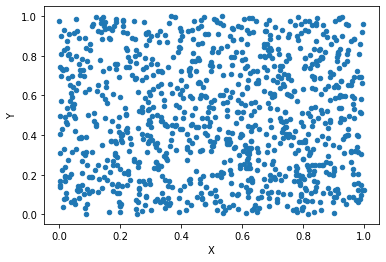

In [4]:
# Plottting a scatter plot to visualize the dataset
df_xy.plot(x="X",y = "Y",kind="scatter")

In [5]:
#Writing first basic model for k = 3
model1 = KMeans(n_clusters=4).fit(df_xy)
model1.labels_

array([0, 2, 2, 0, 0, 3, 2, 3, 3, 2, 3, 1, 2, 3, 1, 2, 0, 0, 2, 1, 3, 3,
       1, 0, 1, 1, 1, 0, 2, 2, 3, 2, 0, 2, 0, 2, 0, 0, 1, 0, 3, 3, 0, 3,
       3, 3, 0, 3, 0, 2, 0, 0, 1, 3, 1, 1, 0, 2, 1, 2, 2, 1, 3, 2, 3, 2,
       0, 1, 2, 1, 0, 0, 2, 3, 2, 1, 2, 1, 3, 2, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 3, 0, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 3, 3, 3, 0, 2, 1, 0,
       0, 3, 2, 2, 1, 2, 2, 2, 2, 3, 2, 1, 3, 0, 1, 0, 3, 2, 2, 2, 1, 0,
       2, 1, 2, 1, 1, 3, 0, 2, 2, 1, 0, 0, 3, 0, 2, 1, 2, 1, 2, 2, 0, 1,
       3, 3, 3, 2, 0, 1, 3, 2, 2, 2, 0, 0, 0, 3, 0, 1, 0, 0, 2, 3, 1, 3,
       0, 0, 3, 2, 2, 3, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       2, 0, 3, 1, 0, 1, 0, 1, 0, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3,
       3, 3, 1, 3, 1, 0, 1, 1, 2, 2, 1, 3, 3, 3, 2, 3, 1, 1, 3, 0, 2, 3,
       1, 1, 3, 3, 1, 2, 0, 2, 2, 2, 1, 0, 3, 3, 2, 1, 1, 3, 0, 1, 0, 3,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 0, 1, 3, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0,
       1, 2, 1, 1, 3, 1, 0, 3, 0, 0, 3, 3, 3, 2, 1,

In [6]:
#Analyzing Cluster centers
model1.cluster_centers_

array([[0.24367805, 0.26211906],
       [0.75975684, 0.75329844],
       [0.74223524, 0.24561139],
       [0.25527188, 0.76235672]])

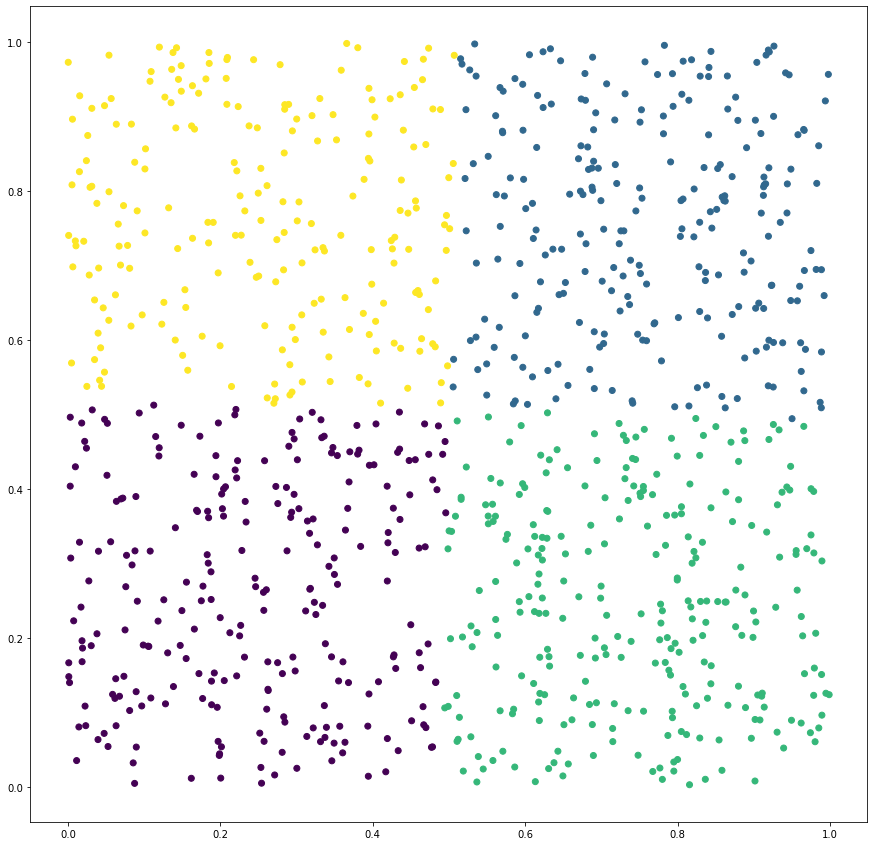

In [7]:
plt.figure(figsize=(15, 15))
plt.scatter(X, Y, c=model1.labels_.astype(float))

In [8]:
#Plotting the dataset post clustering
#df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",cmap=plt.cm.coolwarm)

In [9]:
#Map the above plot with our cluster centers to do the analysis
model1.cluster_centers_

array([[0.24367805, 0.26211906],
       [0.75975684, 0.75329844],
       [0.74223524, 0.24561139],
       [0.25527188, 0.76235672]])

In [46]:
#Reading out university dataset
Univ = pd.read_csv("Datasets/Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [11]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [12]:
#Normalizing the values using min max
df_norm = norm_func(Univ.iloc[:,1:])

In [13]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [14]:
model1 = KMeans(n_clusters=3).fit(df_norm)
model1.labels_

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1,
       1, 2, 0])

In [15]:
model1.cluster_centers_

array([[0.87262873, 0.86882716, 0.13596491, 0.19298246, 0.59180421,
        0.84074074],
       [0.62804878, 0.70138889, 0.34320175, 0.35964912, 0.25795047,
        0.68611111],
       [0.13780488, 0.14930556, 0.73684211, 0.69736842, 0.02276248,
        0.15833333]])

In [16]:
###### scree plot or elbow curve ############

k = list(range(2,10))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in list(range(i)):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

In [17]:
#df_xy.shape[1]

In [18]:
#model1.cluster_centers_[0].reshape(1,df_xy.shape[1])

In [19]:
#sum(cdist(df_xy.iloc[model1.labels_==0,:],model1.cluster_centers_[0].reshape(1,df_xy.shape[1]),"euclidean"))
#model1.cluster_centers_[0].reshape(1,df_norm.shape[1])

In [20]:
TWSS_clusters = pd.DataFrame(columns = ["TWSS", "No. Of Clusters"])

In [21]:
TWSS_clusters.head()

,TWSS,No. Of Clusters


In [22]:
TWSS_clusters.TWSS = pd.Series(TWSS)
TWSS_clusters["No. Of Clusters"]=pd.Series(k)

In [24]:
#Checking how as the number clusters are incresing the TWSS is decreasing
TWSS_clusters.head(10)

,TWSS,No. Of Clusters
0,[9.182081214681874],2
1,[7.859236147506019],3
2,[6.882395161283079],4
3,[6.0013818192832415],5
4,[5.508952482965029],6
5,[5.012175309518638],7
6,[4.4119327035775795],8
7,[3.9647109853110742],9


([<matplotlib.axis.XTick at 0x15a110c8370>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

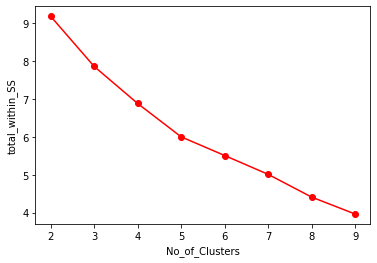

In [25]:
#Plotting number of clusters against TWSS to find the optimal number for K
plt.plot(k,TWSS, 'ro-');
plt.xlabel("No_of_Clusters");
plt.ylabel("total_within_SS");plt.xticks(k)

In [47]:
#Writing a model for less number of k
model1=KMeans(n_clusters=2).fit(df_norm)

In [48]:
model1.labels_ # getting the labels of clusters assigned to each row 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0])

In [49]:
#Writing a model for optimal number of k shown by our elbow plot
model2=KMeans(n_clusters=3).fit(df_norm)

In [50]:
model2.labels_

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0,
       0, 2, 1])

In [51]:
#Writing a model for higher number of k
model3=KMeans(n_clusters=5).fit(df_norm)

In [52]:
model3.labels_

array([0, 4, 3, 2, 2, 0, 0, 2, 0, 4, 0, 2, 2, 1, 0, 1, 0, 1, 3, 2, 3, 2,
       2, 1, 0])

In [53]:
#Creating series for all the models with their respective lables
md1=pd.Series(model1.labels_)
md2=pd.Series(model2.labels_)
md3=pd.Series(model3.labels_)

In [54]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [55]:
#Adding those series in our original dataset
Univ['clust1']=md1
Univ['clust2']=md2
Univ['clust3']=md3

In [56]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clust1,clust2,clust3
0,Brown,1310,89,22,13,22704,94,0,1,0
1,CalTech,1415,100,25,6,63575,81,0,1,4
2,CMU,1260,62,59,9,25026,72,1,0,3
3,Columbia,1310,76,24,12,31510,88,0,1,2
4,Cornell,1280,83,33,13,21864,90,0,0,2


In [57]:
#Reshuffling the columns, last columns are taken first for better reading
Univ = Univ.iloc[:,[9,8,7,0,1,2,3,4,5,6]]

In [58]:
Univ.head()

,clust3,clust2,clust1,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,1,0,Brown,1310,89,22,13,22704,94
1,4,1,0,CalTech,1415,100,25,6,63575,81
2,3,0,1,CMU,1260,62,59,9,25026,72
3,2,1,0,Columbia,1310,76,24,12,31510,88
4,2,0,0,Cornell,1280,83,33,13,21864,90


In [59]:
a = Univ.iloc[:,2:10].groupby(Univ.clust1).mean()
b = Univ.iloc[:,2:10].groupby(Univ.clust2).mean()
c = Univ.iloc[:,2:10].groupby(Univ.clust3).mean()

In [60]:
#First model result
a

,clust1,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust1,,,,,,,
0,0.0,1314.473684,85.789474,30.157895,11.368421,31810.105263,90.736842
1,1.0,1114.333333,47.000000,67.833333,17.000000,13384.666667,74.000000


In [61]:
#Second model result
b

,clust1,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust2,,,,,,,
0,0.2,1253.000000,77.700000,43.500000,12.900000,22008.200000,86.90
1,0.0,1353.181818,89.090909,24.090909,10.181818,38618.727273,92.00
2,1.0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.75


In [62]:
#Third model result
c

,clust1,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust3,,,,,,,
0,0.000000,1356.875000,91.125,21.500000,10.875,33878.750000,94.500000
1,1.000000,1061.500000,38.750,70.000000,19.250,9953.000000,71.750000
2,0.000000,1270.000000,78.875,36.500000,12.375,24494.500000,90.250000
3,0.666667,1226.666667,74.000,55.666667,14.000,18545.333333,78.333333
4,0.000000,1360.000000,87.500,34.500000,6.500,61133.000000,84.000000


### Now you can write the results in result variables and share the file with client

### Also you can rebuild the models by splitting the dataset